# Sunita Inderjit

Project Objective: Build ANN model to detect handwritten digit

# Import the necessary Libraries

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

# Load the mnist dataset

In [40]:
minst = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = minst.load_data()

In [41]:
#check data type
type(x_train)

numpy.ndarray

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
type(x_test)

numpy.ndarray

In [ ]:
dtypes = x_train.dtype # check data type
print(dtypes)

uint8


**Print shape of train and text set**




In [42]:
print('Training data shape:',x_train.shape)
print('Test data shape:',x_test.shape)
print('Training labels shape:',y_train.shape)
print('Test labels shape:',y_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training labels shape: (60000,)
Test labels shape: (10000,)


In [43]:
np.unique(y_train) # multiclass classification range from 0-9

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

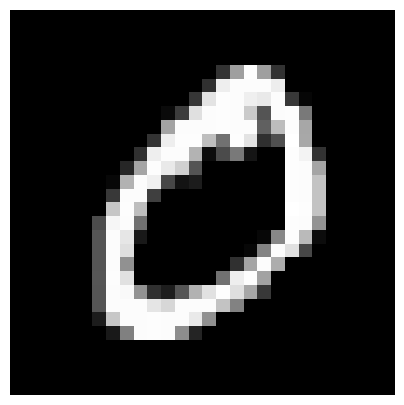

In [44]:
plt.figure(figsize = (5,5))
plt.imshow(x_train[1], cmap = 'gray')
plt.axis('off')


In [45]:
np.set_printoptions(linewidth = 200)
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 18

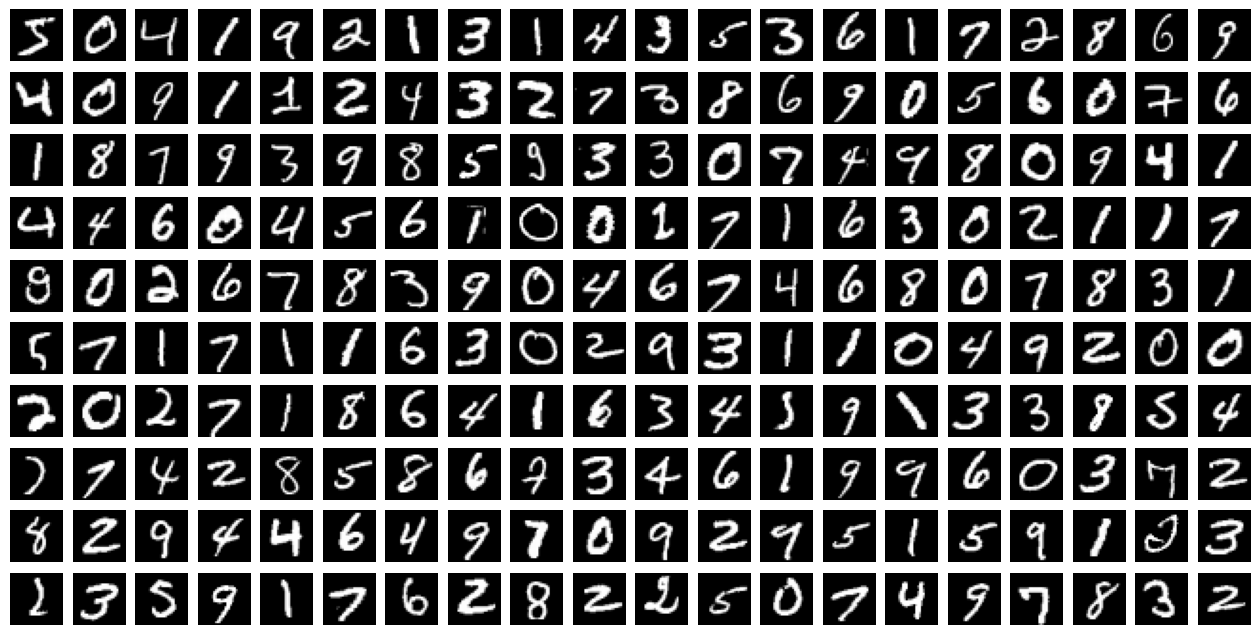

In [46]:
plt.figure(figsize = (16,8))
for i in range(200):
  plt.subplot(10,20,i+1)
  plt.imshow(x_train[i], cmap = 'gray')
  plt.axis('off')

In [47]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test  = to_categorical(y_test, num_classes = 10)

In [48]:
x_train = x_train/255
x_test  = x_test/255

In [49]:
print('Training data shape   : ', x_train.shape)
print('Training labels shape : ', y_train.shape)
print('Testing data shape    : ', x_test.shape)
print('Testing labels shape  : ', y_test.shape)

Training data shape   :  (60000, 28, 28)
Training labels shape :  (60000, 10)
Testing data shape    :  (10000, 28, 28)
Testing labels shape  :  (10000, 10)


# Create and Train Artifical Neural Network
1. Create the architecture
2. Compile the model
3. Fit the model

In [50]:
# Creating the architecture
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, 'softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 200)                 │         157,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer  = SGD(),
              metrics = ['accuracy'])

In [52]:
history = model.fit(x_train,
          y_train,
          validation_data = (x_test, y_test),
          batch_size = 500,
          epochs = 100,
          verbose = 1)

Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2435 - loss: 2.1775 - val_accuracy: 0.6741 - val_loss: 1.5999
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7172 - loss: 1.4322 - val_accuracy: 0.8075 - val_loss: 0.9759
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8104 - loss: 0.9087 - val_accuracy: 0.8428 - val_loss: 0.6937
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8426 - loss: 0.6798 - val_accuracy: 0.8623 - val_loss: 0.5638
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8612 - loss: 0.5637 - val_accuracy: 0.8764 - val_loss: 0.4907
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8721 - loss: 0.4985 - val_accuracy: 0.8834 - val_loss: 0.4436
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8820 - loss: 0.4508 - val_accuracy: 0.8905 - val_loss: 0.4108
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8877 - loss: 0.4211 - val_accu

In [53]:
acc_train = history.history['accuracy']
acc_val   = history.history['val_accuracy']

loss_train = history.history['loss']
loss_val   = history.history['val_loss']

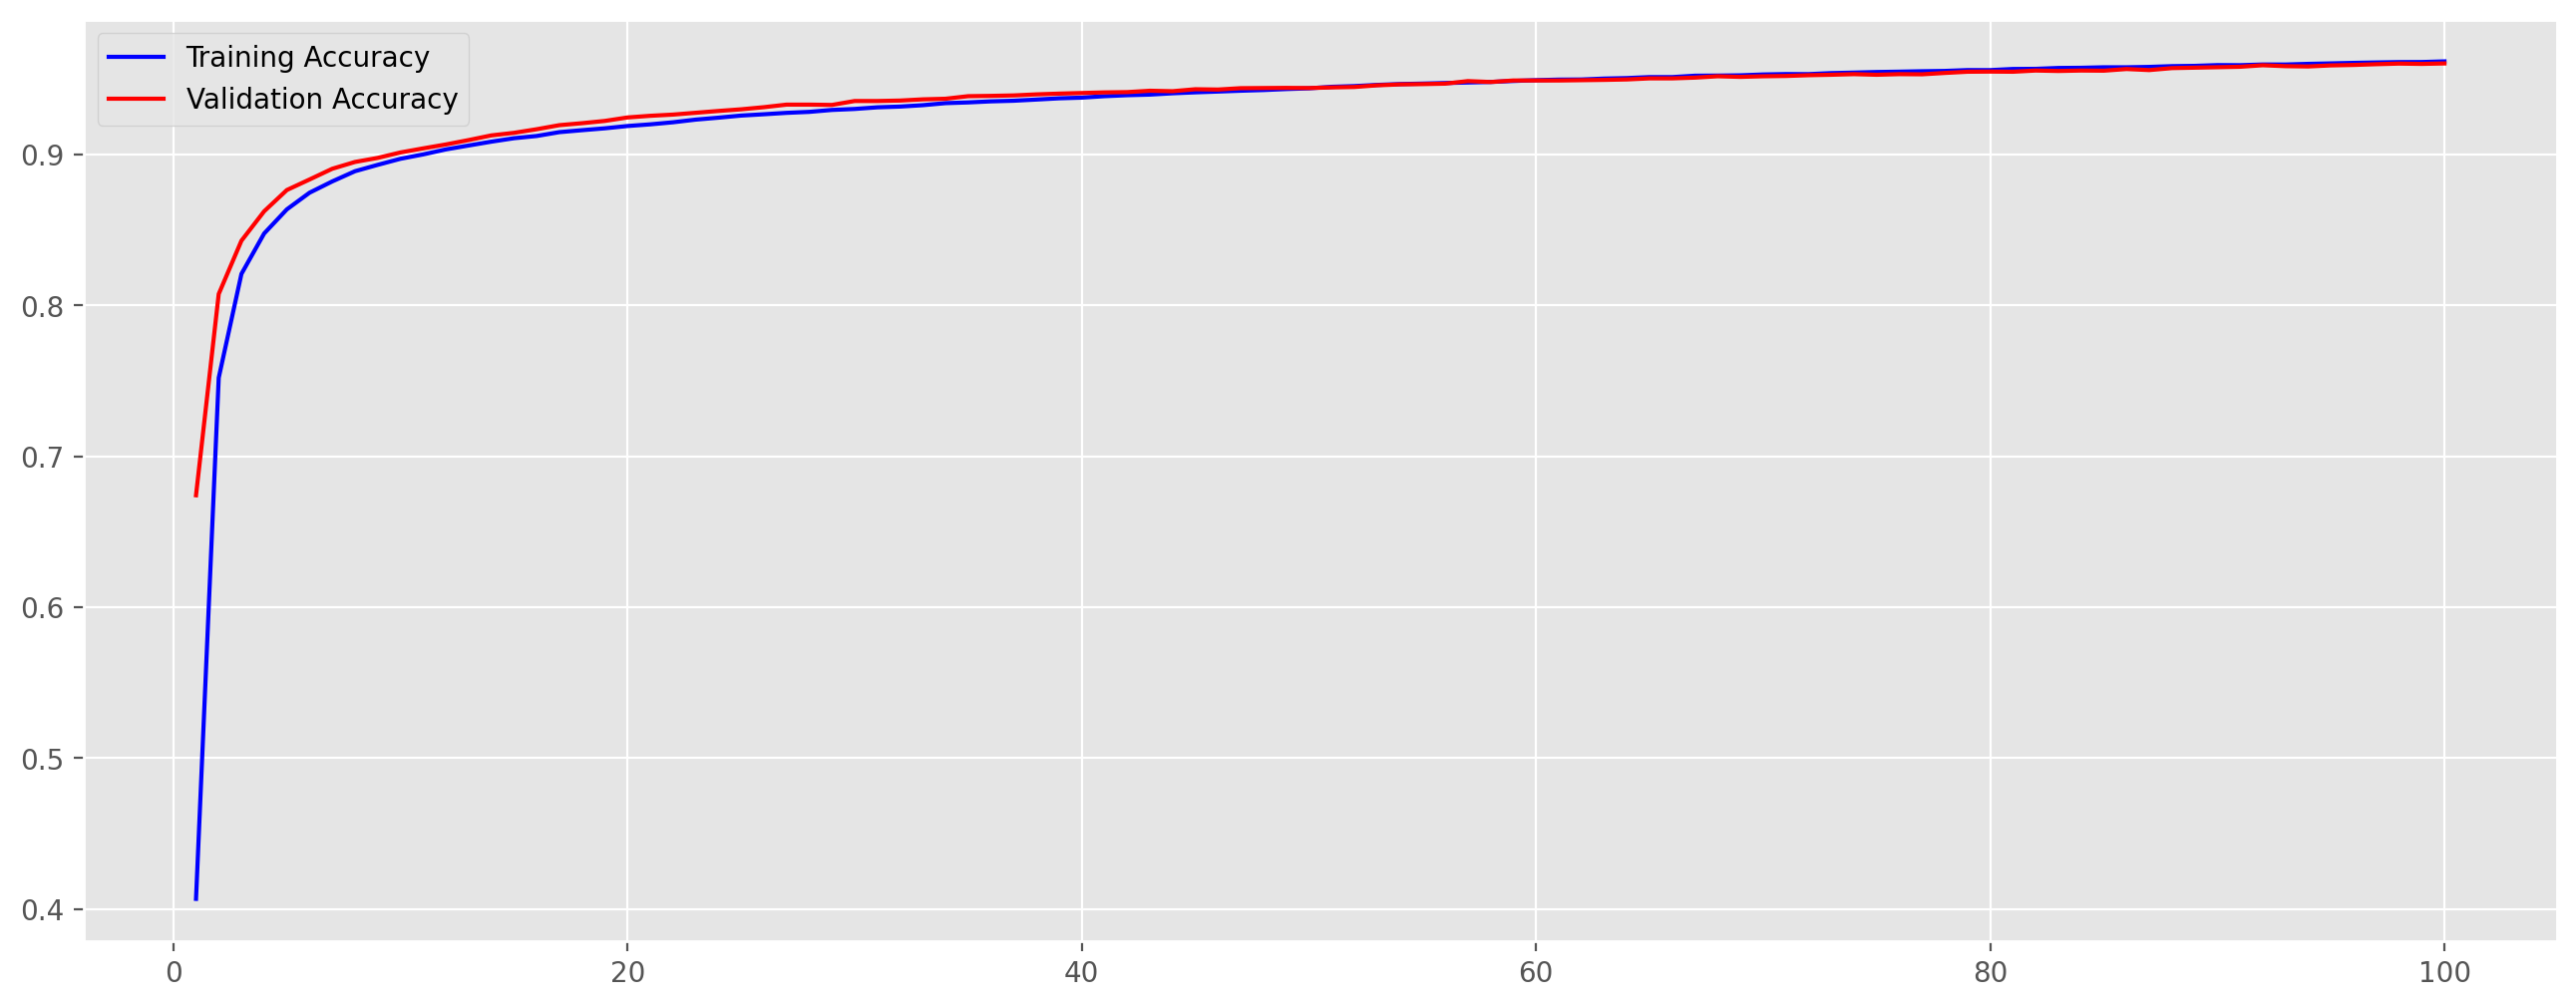

In [54]:
num_epochs = range(1,101)

plt.figure(figsize  =(16,6), dpi = 200)
plt.plot(num_epochs, acc_train, c = 'blue', label = 'Training Accuracy')
plt.plot(num_epochs, acc_val, c = 'red', label = 'Validation Accuracy')
plt.legend()
plt.show()

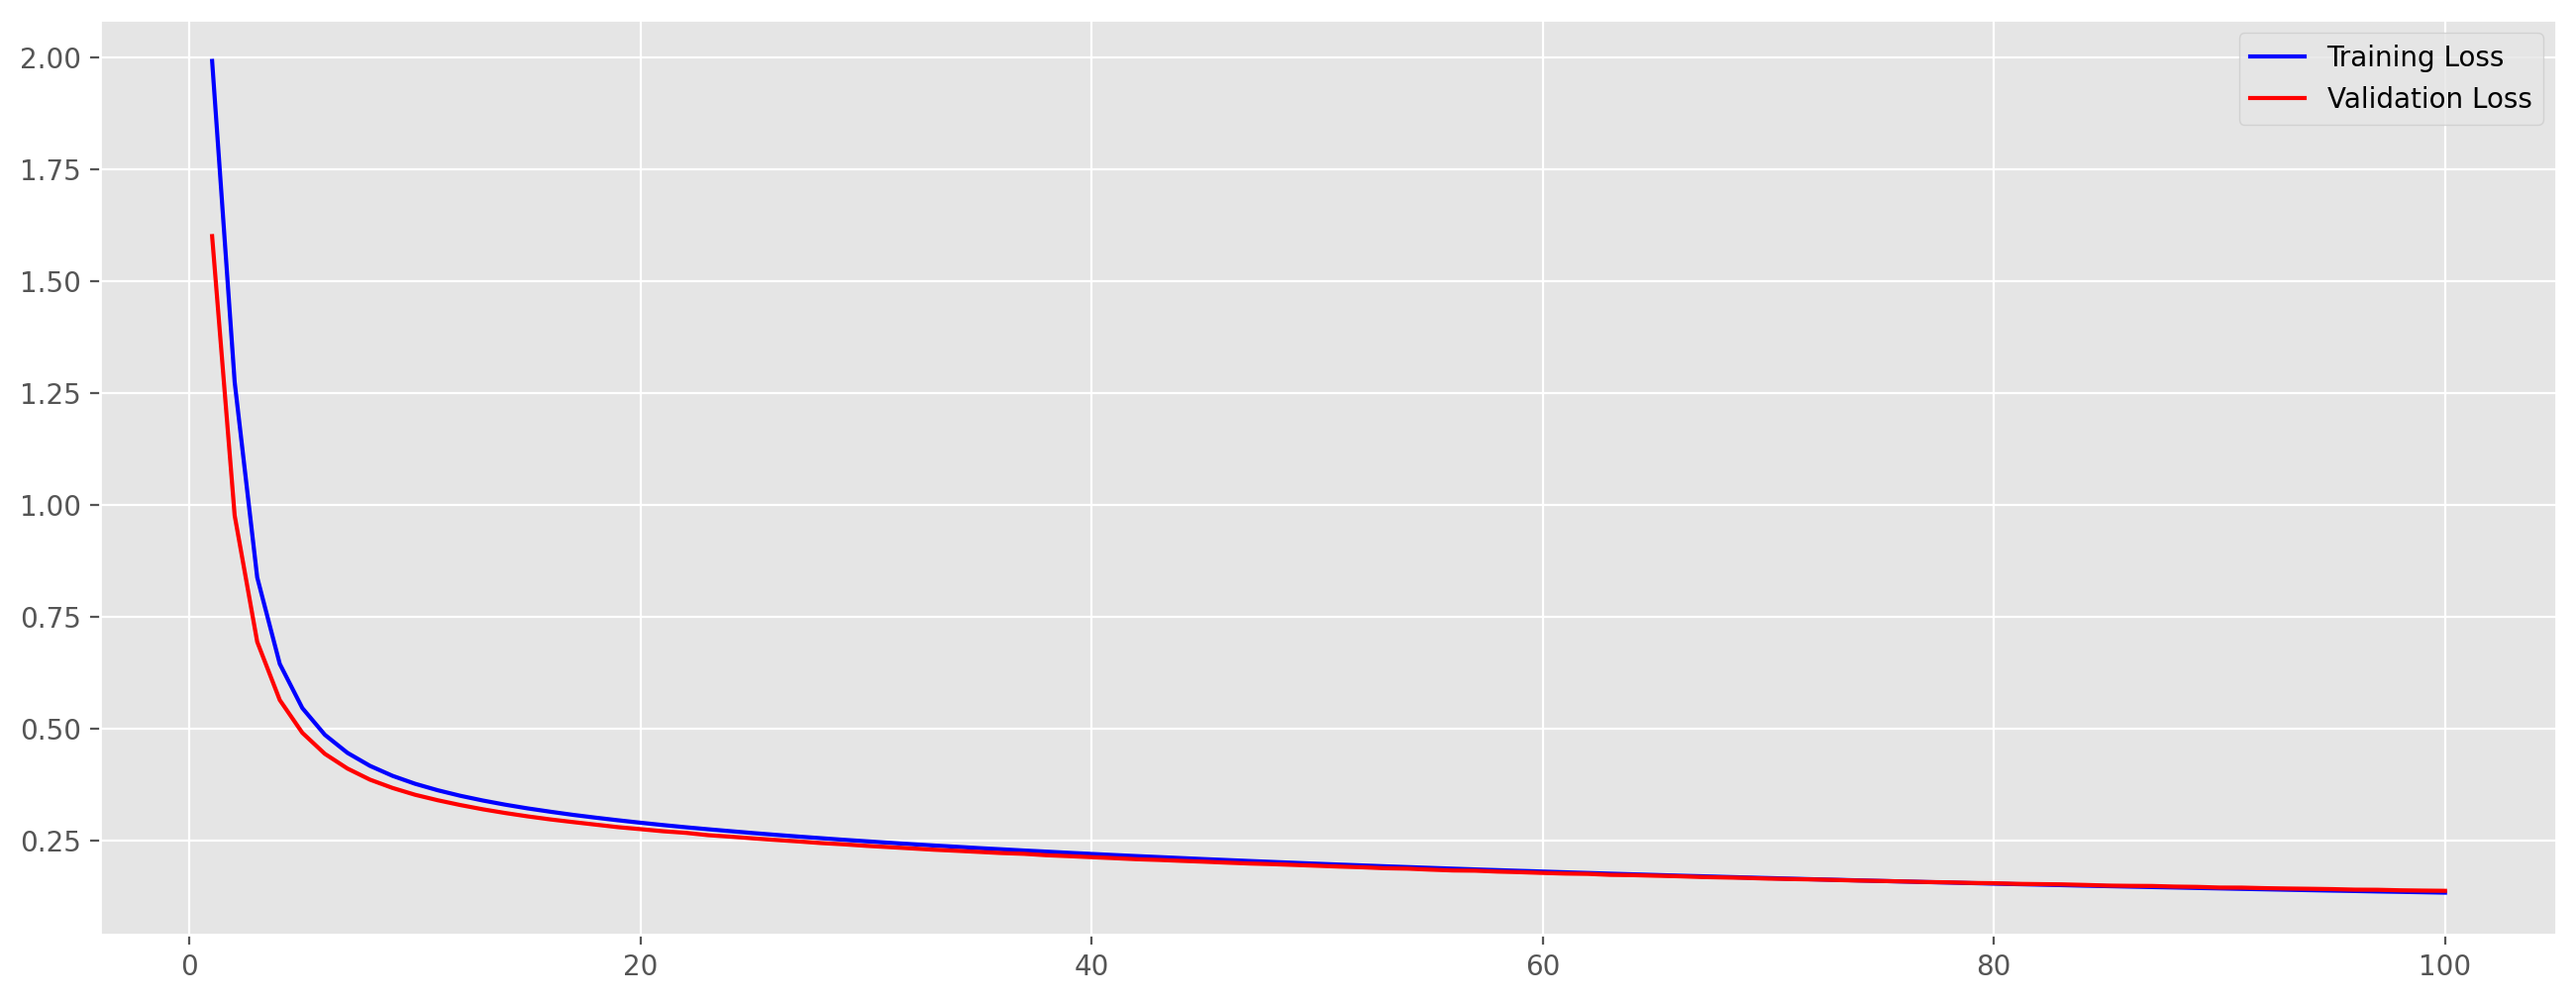

In [55]:
plt.figure(figsize  =(16,6), dpi = 200)
plt.plot(num_epochs, loss_train, c = 'blue', label = 'Training Loss')
plt.plot(num_epochs, loss_val, c = 'red', label = 'Validation Loss')
plt.legend()
plt.show()

In [56]:
model.predict(x_train[1:2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


array([[9.9983025e-01, 2.2585127e-08, 1.2331251e-04, 9.0864305e-06, 3.3683332e-08, 2.3793431e-05, 1.8589416e-06, 4.6831784e-07, 1.5375817e-06, 9.5625855e-06]], dtype=float32)

In [57]:
model.predict(x_train[0:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


array([[2.7911627e-05, 1.6361248e-06, 1.9684176e-04, 2.6979784e-02, 5.3799369e-09, 9.7273457e-01, 2.5745487e-07, 2.1292550e-05, 1.3780068e-05, 2.3933304e-05],
       [9.9983025e-01, 2.2585082e-08, 1.2331239e-04, 9.0864132e-06, 3.3683268e-08, 2.3793364e-05, 1.8589399e-06, 4.6831735e-07, 1.5375788e-06, 9.5625674e-06],
       [1.9721566e-03, 2.5411183e-04, 9.6807249e-02, 2.0622056e-02, 8.1772161e-01, 8.3550811e-04, 1.0034104e-02, 1.5090919e-02, 3.9580101e-03, 3.2704353e-02],
       [9.2606078e-06, 9.9441832e-01, 1.2806522e-03, 7.2032434e-04, 1.0579219e-04, 1.9984503e-04, 3.2447500e-05, 1.5157472e-03, 1.7130068e-03, 4.7654203e-06],
       [2.9766300e-06, 6.8697650e-06, 6.8630065e-06, 4.1044663e-05, 2.3905549e-02, 1.8785891e-04, 7.7288678e-07, 1.6253887e-03, 2.1797833e-03, 9.7204292e-01],
       [2.3169790e-05, 3.1224661e-07, 9.9376297e-01, 2.5322132e-03, 3.7756179e-06, 1.2930017e-05, 1.4904068e-06, 6.0209724e-05, 3.0513927e-03, 5.5140507e-04],
       [6.6739627e-09, 9.9912888e-01, 4.241314

In [58]:
np.argmax(model.predict(x_train[:1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


5

In [59]:
np.argmax(model.predict(x_train[:10]), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [60]:
def predict_digit(x):
  preds = model.predict(x)
  preds = np.argmax(preds, axis = 1)

  for pred in preds:
    print('The image is a : ', pred)

In [61]:
predict_digit(x_train[0:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The image is a :  5
The image is a :  0
The image is a :  4
The image is a :  1
The image is a :  9
The image is a :  2
The image is a :  1
The image is a :  3
The image is a :  1
The image is a :  4


In [62]:
def read_image(path):
  image = cv2.imread(path)
  image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  image = cv2.resize(image, (28,28))
  image = image.reshape((1, 28, 28))
  return image

Testing the model with new image. Model was able to recognize and predict image correctly!

In [64]:
import cv2

In [65]:
path = '/content/download.png'
img = read_image(path)
predict_digit(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
The image is a :  7


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
The image is a :  5


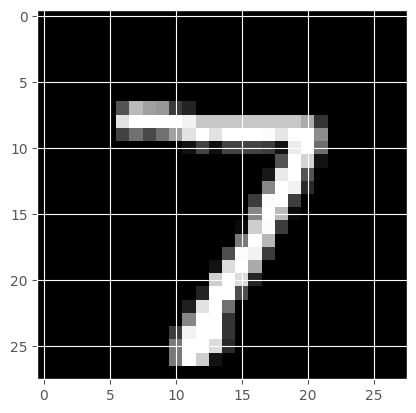

In [70]:
plt.imshow(img.reshape(28,28,1), cmap = 'gray')
img=abs(255-img)
predict_digit(img)

# Conclusion



The model demonstrates strong accuracy on both the training and validation datasets. It effectively recognizes and predicts handwritten digits with high precision. Further improvements can be achieved by adding more layers, increasing the number of neurons per layer, or experimenting with alternative optimizers. This model has potential for real-world applications in handwritten digit recognition.

